11490434/11490434 [==============================] - 0s 0us/step


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Random Forest F1-score: 0.9637701960806204
Logistic Regression F1-score: 0.9024932874912758


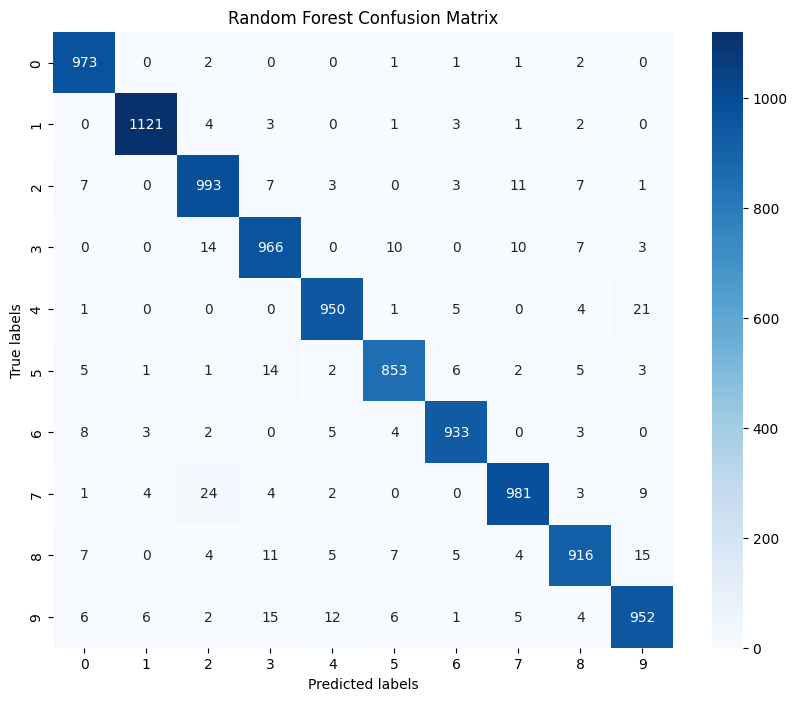

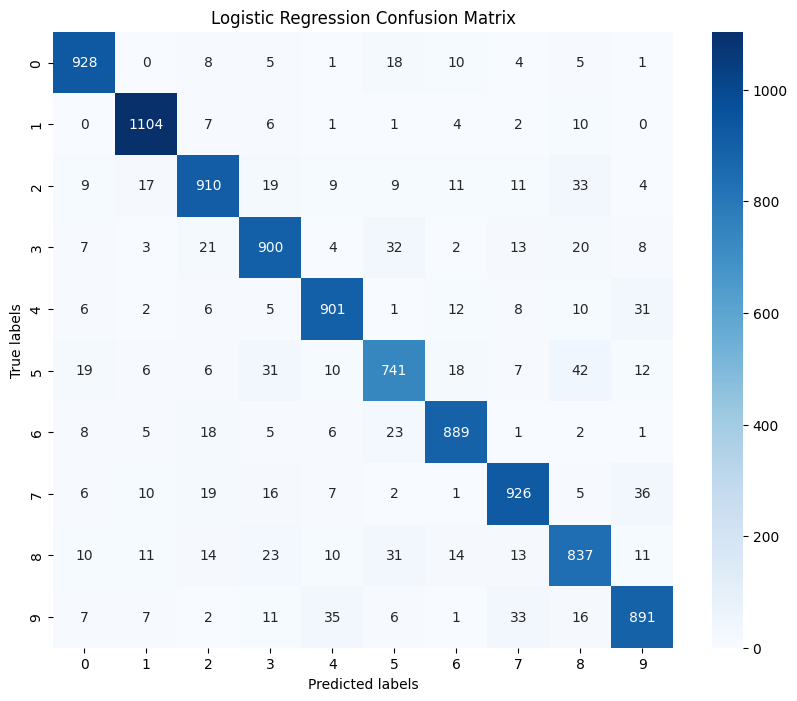

In [1]:
import numpy as np
from keras.datasets import mnist
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix
import seaborn as sns  #data visualisation libray used in confusion matrix.
import matplotlib.pyplot as plt


# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train[:30000]
y_train = y_train[:30000]

# Reshape the data into 1D arrays
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Initialize and train the Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_flat, y_train)

# Initialize and train the Logistic Regression classifier
lr_clf = LogisticRegression(max_iter=1000, random_state=42)
lr_clf.fit(X_train_flat, y_train)

# Make predictions
rf_predictions = rf_clf.predict(X_test_flat)
lr_predictions = lr_clf.predict(X_test_flat)

# Calculate F1-score
rf_f1_score = f1_score(y_test, rf_predictions, average='weighted')
lr_f1_score = f1_score(y_test, lr_predictions, average='weighted')

# Calculate Confusion Matrix
rf_conf_matrix = confusion_matrix(y_test, rf_predictions)
lr_conf_matrix = confusion_matrix(y_test, lr_predictions)

print("Random Forest F1-score:", rf_f1_score)
print("Logistic Regression F1-score:", lr_f1_score)

# Plot Confusion Matrix for Random Forest
plt.figure(figsize=(10, 8))
sns.heatmap(rf_conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Random Forest Confusion Matrix")
plt.show()



# Plot Confusion Matrix for Logistic Regression
plt.figure(figsize=(10, 8))
sns.heatmap(lr_conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

In [20]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [21]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [22]:
from sklearn.model_selection import train_test_split
x_train, _, y_train, _ = train_test_split(x_train, y_train, train_size=0.5, stratify=y_train)

In [23]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((30000, 28, 28), (10000, 28, 28), (30000,), (10000,))

In [24]:
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values to [0, 1]

In [25]:
# Define the MLP model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # Flatten input images to 1D array
    tf.keras.layers.Dense(30, activation='relu'),   # 30 neurons in the first layer
    tf.keras.layers.Dense(20, activation='relu'),   # 20 neurons in the second layer
    tf.keras.layers.Dense(10, activation='softmax')  # Output layer with 10 neurons (for 10 classes)
])

In [26]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test Loss: {test_loss}\n')
print(f'Test accuracy: {test_acc}')


Epoch 1/5
938/938 [==============================] - 4s 3ms/step - loss: 0.5086 - accuracy: 0.8561
Epoch 2/5
938/938 [==============================] - 3s 3ms/step - loss: 0.2402 - accuracy: 0.9308
Epoch 3/5
938/938 [==============================] - 3s 3ms/step - loss: 0.1890 - accuracy: 0.9447
Epoch 4/5
938/938 [==============================] - 3s 3ms/step - loss: 0.1609 - accuracy: 0.9518
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.1691 - accuracy: 0.9509
Test Loss: 0.16911548376083374

Test accuracy: 0.9509000182151794


313/313 [==============================] - 1s 2ms/step


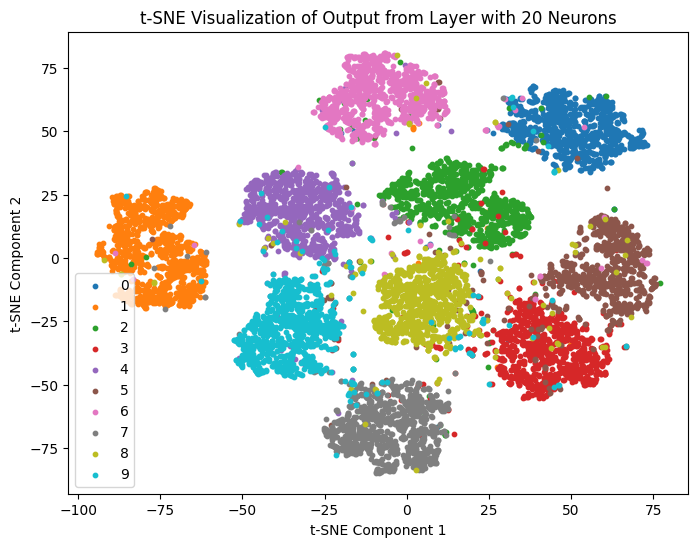

In [27]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

layer20_output_model = tf.keras.Model(inputs=model.input, outputs=model.layers[2].output)
layer20_output = layer20_output_model.predict(x_test)

# Apply t-SNE to reduce dimensionality to 2D
tsne = TSNE(n_components=2, random_state=42)
tsne_output = tsne.fit_transform(layer20_output)

# Plot t-SNE embeddings
plt.figure(figsize=(8, 6))
for i in range(10):  # assuming 10 digits
    indices = (y_test == i)
    plt.scatter(tsne_output[indices, 0], tsne_output[indices, 1], label=str(i), s=10)
plt.title('t-SNE Visualization of Output from Layer with 20 Neurons')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()

Epoch 1/5
938/938 [==============================] - 4s 3ms/step - loss: 0.0773 - accuracy: 0.9765
Epoch 2/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0686 - accuracy: 0.9793
Epoch 3/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0642 - accuracy: 0.9802
Epoch 4/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0575 - accuracy: 0.9815
Epoch 5/5
938/938 [==============================] - 1s 1ms/step


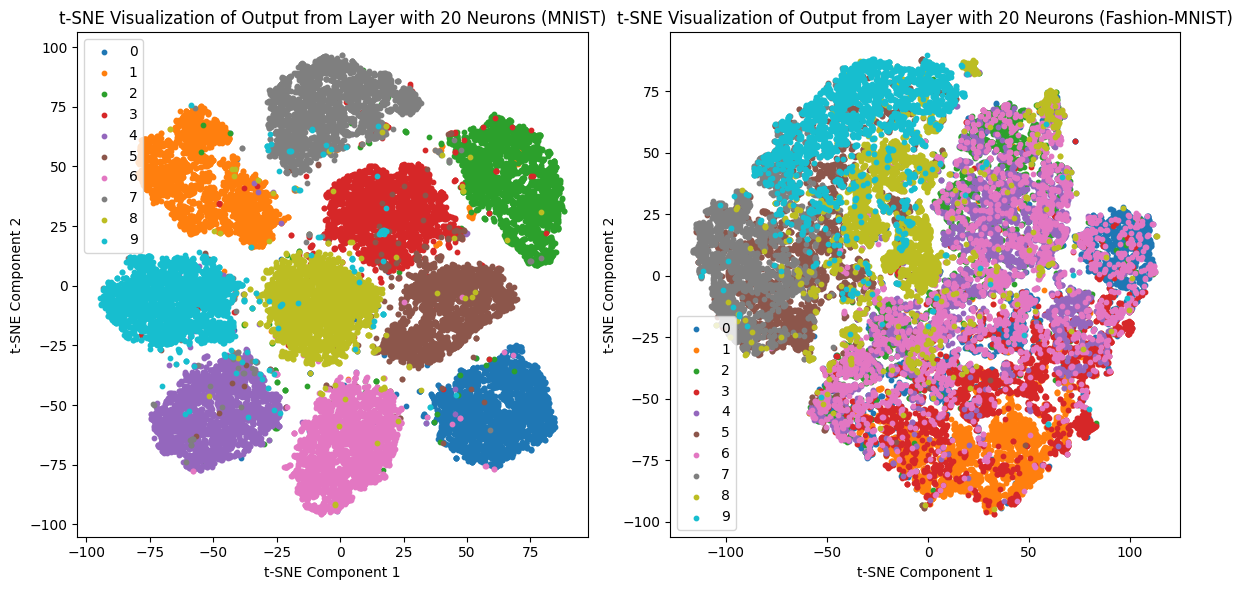

In [31]:
from sklearn.model_selection import train_test_split
# Load Fashion-MNIST dataset
(x_train_fashion, y_train_fashion), (_, _) = tf.keras.datasets.fashion_mnist.load_data()

x_train_fashion, _, y_train_fashion, _ = train_test_split(x_train_fashion, y_train_fashion, train_size=0.5, stratify=y_train_fashion)
x_train_fashion = x_train_fashion / 255.0  # Normalize pixel values to [0, 1]


# Compile and train the model on MNIST dataset
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5)

# Extract output from the layer containing 20 neurons for MNIST dataset
layer20_output_mnist = tf.keras.Model(inputs=model.input, outputs=model.layers[2].output).predict(x_train)

# Extract output from the layer containing 20 neurons for Fashion-MNIST dataset
layer20_output_fashion = tf.keras.Model(inputs=model.input, outputs=model.layers[2].output).predict(x_train_fashion)

# Apply t-SNE to reduce dimensionality to 2D for MNIST embeddings
tsne_mnist = TSNE(n_components=2, random_state=42)
tsne_output_mnist = tsne_mnist.fit_transform(layer20_output_mnist)

# Apply t-SNE to reduce dimensionality to 2D for Fashion-MNIST embeddings
tsne_fashion = TSNE(n_components=2, random_state=42)
tsne_output_fashion = tsne_fashion.fit_transform(layer20_output_fashion)

# Plot t-SNE embeddings for MNIST and Fashion-MNIST
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
for i in range(10):  # assuming 10 classes
    indices = (y_train == i)
    plt.scatter(tsne_output_mnist[indices, 0], tsne_output_mnist[indices, 1], label=str(i), s=10)
plt.title('t-SNE Visualization of Output from Layer with 20 Neurons (MNIST)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()

plt.subplot(1, 2, 2)
for i in range(10):  # assuming 10 classes
    indices = (y_train_fashion == i)
    plt.scatter(tsne_output_fashion[indices, 0], tsne_output_fashion[indices, 1], label=str(i), s=10)
plt.title('t-SNE Visualization of Output from Layer with 20 Neurons (Fashion-MNIST)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()

plt.tight_layout()
plt.show()


313/313 [==============================] - 0s 1ms/step


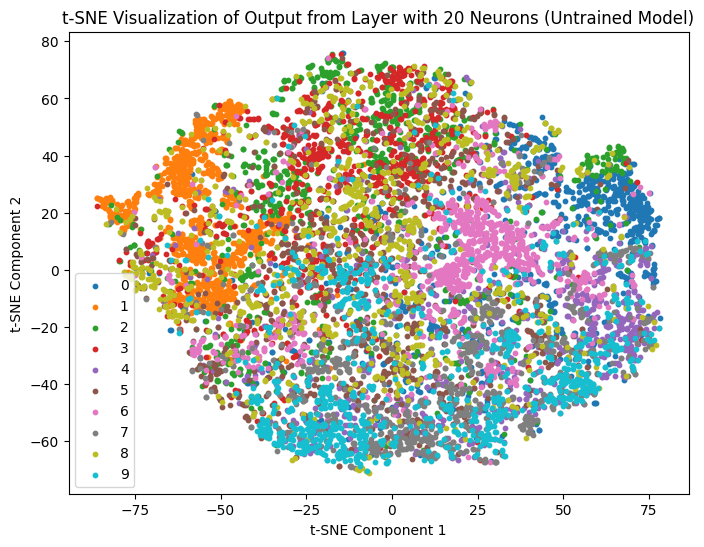

In [32]:
# Define the MLP model with 20 neurons in the second layer
untrained_model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # Flatten input images to 1D array
    tf.keras.layers.Dense(30, activation='relu'),   # 30 neurons in the first layer
    tf.keras.layers.Dense(20, activation='relu'),   # 20 neurons in the second layer
    tf.keras.layers.Dense(10, activation='softmax')  # Output layer with 10 neurons (for 10 classes)
])

# Extract output from the layer containing 20 neurons of the untrained model
layer20_output_model = tf.keras.Model(inputs=untrained_model.input, outputs=untrained_model.layers[2].output)
layer20_output_untrained = layer20_output_model.predict(x_test)

# Apply t-SNE to reduce dimensionality to 2D for the output of the untrained model
tsne_untrained = TSNE(n_components=2, random_state=42)
tsne_output_untrained = tsne_untrained.fit_transform(layer20_output_untrained)

# Plot t-SNE embeddings for the untrained model
plt.figure(figsize=(8, 6))
for i in range(10):  # assuming 10 digits
    indices = (y_test == i)
    plt.scatter(tsne_output_untrained[indices, 0], tsne_output_untrained[indices, 1], label=str(i), s=10)
plt.title('t-SNE Visualization of Output from Layer with 20 Neurons (Untrained Model)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()